# TP2: Visualización de la Información - Comisión: ECD2024C
###### Leonardo Costas
###### Pablo Hrbacek

In [1]:
import pandas as pd

In [3]:
listing = pd.read_csv('https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2025-01-29/visualisations/listings.csv')
listing_big = pd.read_csv('https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2025-01-29/data/listings.csv.gz')

In [4]:
listing.info()
listing_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35172 non-null  int64  
 1   name                            35172 non-null  object 
 2   host_id                         35172 non-null  int64  
 3   host_name                       35166 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   35172 non-null  object 
 6   latitude                        35172 non-null  float64
 7   longitude                       35172 non-null  float64
 8   room_type                       35172 non-null  object 
 9   price                           31598 non-null  float64
 10  minimum_nights                  35172 non-null  int64  
 11  number_of_reviews               35172 non-null  int64  
 12  last_review                     

In [5]:
listing.drop(columns=['neighbourhood_group','license'], inplace=True)
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35172 non-null  int64  
 1   name                            35172 non-null  object 
 2   host_id                         35172 non-null  int64  
 3   host_name                       35166 non-null  object 
 4   neighbourhood                   35172 non-null  object 
 5   latitude                        35172 non-null  float64
 6   longitude                       35172 non-null  float64
 7   room_type                       35172 non-null  object 
 8   price                           31598 non-null  float64
 9   minimum_nights                  35172 non-null  int64  
 10  number_of_reviews               35172 non-null  int64  
 11  last_review                     29412 non-null  object 
 12  reviews_per_month               

48


<Axes: >

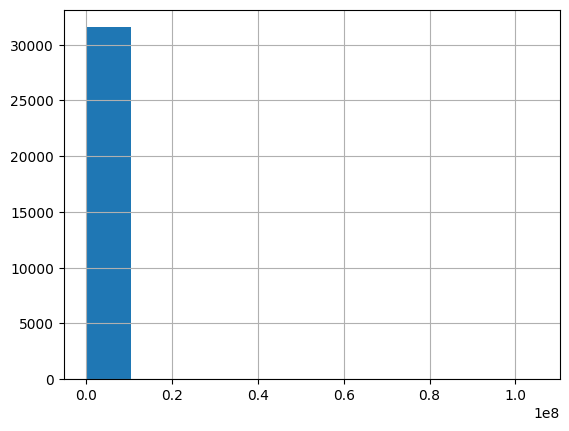

In [9]:
print(listing['neighbourhood'].nunique())
listing['price'].hist()

In [10]:
lower_bound = listing['price'].quantile(0.01)
upper_bound = listing['price'].quantile(0.99)
listing_filtered = listing[(listing['price'] >= lower_bound) & (listing['price'] <= upper_bound)]

<class 'pandas.core.frame.DataFrame'>
Index: 31013 entries, 0 to 35171
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31013 non-null  int64  
 1   name                            31013 non-null  object 
 2   host_id                         31013 non-null  int64  
 3   host_name                       31007 non-null  object 
 4   neighbourhood                   31013 non-null  object 
 5   latitude                        31013 non-null  float64
 6   longitude                       31013 non-null  float64
 7   room_type                       31013 non-null  object 
 8   price                           31013 non-null  float64
 9   minimum_nights                  31013 non-null  int64  
 10  number_of_reviews               31013 non-null  int64  
 11  last_review                     26768 non-null  object 
 12  reviews_per_month               26768

<Axes: >

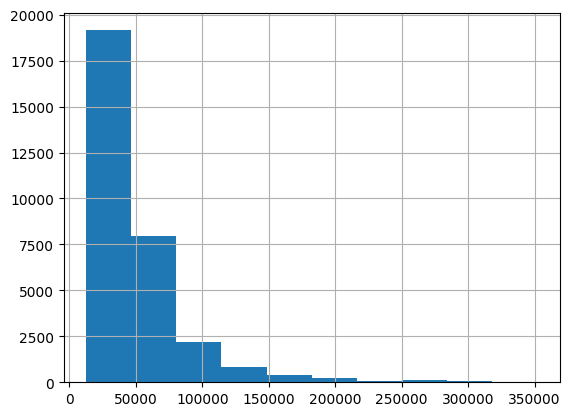

In [11]:
listing_filtered.info()
listing_filtered['price'].hist()

In [12]:
listing_filtered.to_csv('listings_filtered.csv', index=False)

In [13]:
reviews = pd.read_csv('reviews_with_language.csv')

In [15]:
reviews.info()
print(reviews['language'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985786 entries, 0 to 985785
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     985786 non-null  int64 
 1   id             985786 non-null  int64 
 2   date           985786 non-null  object
 3   reviewer_id    985786 non-null  int64 
 4   reviewer_name  985785 non-null  object
 5   comments       985741 non-null  object
 6   language       981635 non-null  object
dtypes: int64(3), object(4)
memory usage: 52.6+ MB
['en' 'de' 'es' 'pt' 'ro' 'fr' 'ru' nan 'sk' 'it' 'no' 'ca' 'cs' 'nl' 'sw'
 'tl' 'tr' 'cy' 'zh-tw' 'zh-cn' 'lt' 'id' 'sv' 'fi' 'ko' 'so' 'hu' 'da'
 'hr' 'pl' 'el' 'af' 'vi' 'ja' 'he' 'sq' 'uk' 'sl' 'ar' 'lv' 'et' 'mk'
 'bg' 'th']


In [16]:
language_mapping = {
    'en': 'English',
    'de': 'German',
    'es': 'Spanish',
    'pt': 'Portuguese',
    'ro': 'Romanian',
    'fr': 'French',
    'ru': 'Russian',
    'sk': 'Slovak',
    'it': 'Italian',
    'no': 'Norwegian',
    'ca': 'Catalan',
    'cs': 'Czech',
    'nl': 'Dutch',
    'sw': 'Swahili',
    'tl': 'Tagalog',
    'tr': 'Turkish',
    'cy': 'Welsh',
    'zh-tw': 'Chinese',
    'zh-cn': 'Chinese',
    'lt': 'Lithuanian',
    'id': 'Indonesian',
    'sv': 'Swedish',
    'fi': 'Finnish',
    'ko': 'Korean',
    'so': 'Somali',
    'hu': 'Hungarian',
    'da': 'Danish',
    'hr': 'Croatian',
    'pl': 'Polish',
    'el': 'Greek',
    'af': 'Afrikaans',
    'vi': 'Vietnamese',
    'ja': 'Japanese',
    'he': 'Hebrew',
    'sq': 'Albanian',
    'uk': 'Ukrainian',
    'sl': 'Slovenian',
    'ar': 'Arabic',
    'lv': 'Latvian',
    'et': 'Estonian',
    'mk': 'Macedonian',
    'bg': 'Bulgarian',
    'th': 'Thai',
}

reviews['language'] = reviews['language'].replace(language_mapping)

In [17]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r<br/>\r<br/>Location: short wa...,English
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...,English
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...,English
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build...",English
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...,English


In [18]:
reviews.dropna(subset=['language'], inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981635 entries, 0 to 985785
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     981635 non-null  int64 
 1   id             981635 non-null  int64 
 2   date           981635 non-null  object
 3   reviewer_id    981635 non-null  int64 
 4   reviewer_name  981634 non-null  object
 5   comments       981635 non-null  object
 6   language       981635 non-null  object
dtypes: int64(3), object(4)
memory usage: 59.9+ MB


In [20]:
reviews_filtered = reviews.drop(columns=['id', 'date', 'reviewer_name', 'comments'])
reviews_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981635 entries, 0 to 985785
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   listing_id   981635 non-null  int64 
 1   reviewer_id  981635 non-null  int64 
 2   language     981635 non-null  object
dtypes: int64(2), object(1)
memory usage: 30.0+ MB


In [21]:
reviews_filtered.to_csv('reviews_filtered.csv', index=False)

In [23]:
language_counts = reviews_filtered['language'].value_counts()
print(language_counts)

language
Spanish       566070
English       218162
Portuguese    147140
French         14852
German          7975
Romanian        5964
Italian         4203
Russian         2920
Catalan         1777
Dutch           1750
Slovak          1275
Korean          1259
Chinese          958
Somali           723
Hebrew           648
Tagalog          599
Afrikaans        567
Lithuanian       474
Indonesian       412
Polish           360
Swedish          340
Welsh            334
Danish           332
Turkish          327
Norwegian        324
Japanese         305
Finnish          270
Czech            209
Slovenian        196
Hungarian        167
Swahili          146
Croatian         142
Vietnamese       136
Latvian           64
Ukrainian         63
Bulgarian         48
Estonian          43
Greek             39
Albanian          22
Arabic            20
Macedonian        18
Thai               2
Name: count, dtype: int64


In [24]:
languages_to_keep = language_counts[language_counts >= 1000].index.tolist()
reviews_reduced = reviews[reviews['language'].isin(languages_to_keep)]

In [25]:
reviews_reduced.to_csv('reviews_reduced.csv', index=False)

In [5]:
calendar = pd.read_csv('calendar_filtered.csv')

In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298925 entries, 0 to 4298924
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
dtypes: int64(1), object(2)
memory usage: 98.4+ MB


In [7]:
calendar['available'] = calendar['available'].replace({'t':0, 'f':1})

<ipython-input-7-b92cc28690b5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calendar['available'] = calendar['available'].replace({'t':0, 'f':1})


In [8]:
calendar =calendar.rename(columns={'available': 'ocupado'})

In [9]:
calendar.to_csv('calendar_inverted.csv', index=False)